In [6]:
import pandas as pd 
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data_set=pd.read_csv('data/Consumo_cerveja.csv')

In [8]:
data_set.head(5)

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [9]:
data_set.shape

(941, 7)

In [10]:
data_set.isnull().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

Cleaning the Data

In [11]:
data_set=data_set.rename(columns={'Data': 'Date','Temperatura Media (C)': 'Medium Temp','Temperatura Minima (C)':'Min Temp', 'Temperatura Maxima (C)':'Max Temp','Precipitacao (mm)': 'Precipitation(mm)','Final de Semana':'End of week','Consumo de cerveja (litros)':'Beer consumption (liters)'})

data_set.head()

,Date,Medium Temp,Min Temp,Max Temp,Precipitation(mm),End of week,Beer consumption (liters)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [12]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       365 non-null    object 
 1   Medium Temp                365 non-null    object 
 2   Min Temp                   365 non-null    object 
 3   Max Temp                   365 non-null    object 
 4   Precipitation(mm)          365 non-null    object 
 5   End of week                365 non-null    float64
 6   Beer consumption (liters)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [13]:
data_set.dropna(inplace=True)

In [14]:
data_set['Medium Temp'] = data_set['Medium Temp'].str.replace(',', '.').astype('float')
data_set['Min Temp'] = data_set['Min Temp'].str.replace(',', '.').astype('float')
data_set['Max Temp'] = data_set['Max Temp'].str.replace(',', '.').astype('float')
data_set['Precipitation(mm)'] = data_set['Precipitation(mm)'].str.replace(',', '.').astype('float')

In [15]:
data_set.head()

,Date,Medium Temp,Min Temp,Max Temp,Precipitation(mm),End of week,Beer consumption (liters)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [16]:
data_set['Date'] = pd.to_datetime(data_set['Date'])

In [17]:
data_set.head()

,Date,Medium Temp,Min Temp,Max Temp,Precipitation(mm),End of week,Beer consumption (liters)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


Extracting and splitting the datset

In [18]:
x=data_set.iloc[:,-6:-1]
y=data_set.iloc[:,6]


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=0)  

Fitting the dataset into Linear Regression Model

In [20]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

The calculated coefficients:

In [21]:
regressor.coef_

array([-0.01022027, -0.01086876,  0.68946016, -0.06228686,  5.22127289])

Predicting

In [16]:
y_pred= regressor.predict(x_test) 
y_pred

array([22.14232417, 28.51473233, 28.97803693, 25.51162874, 24.81814189,
       31.63694002, 24.78418805, 27.52889825, 19.6372663 , 29.04045441,
       21.10813699, 23.39093893, 28.43540606, 25.47327467, 25.40487493,
       24.37735189, 20.67741743, 28.81709039, 25.18153642, 23.12333109,
       27.93036966, 28.97828047, 29.01499449, 27.84247181, 27.32258236,
       20.23840455, 23.73845976, 27.87478084, 25.19677728, 24.78311233,
       19.62118866, 23.57187665, 28.17043733, 29.82001864, 27.78549129,
       26.07000944, 25.98168714, 18.79249818, 28.75381714, 25.47065684,
       26.8284911 , 31.25061261, 29.32831523, 29.53096447, 27.06169518,
       22.12772651, 29.26153311, 24.43114719, 29.57146843, 27.00954725,
       23.49320873, 29.17792906, 20.05914916, 29.87707168, 24.62419981,
       25.90241743, 32.24801404, 26.54005692, 25.73997299, 22.44767108,
       21.26142353, 20.43285414, 25.38360074, 30.65568442, 20.98059391,
       25.04090742, 24.55586056, 29.23018854, 30.26097859, 23.81

In [17]:
print('Train Score: ', regressor.score(x_train, y_train))  
print('Test Score: ', regressor.score(x_test, y_test))

Train Score:  0.7425032998735183
Test Score:  0.6562851003520107


In [18]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)

5.589487802905196

## Feature Selection

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

## Feature selection using correlation 

In [25]:
# feature selection
f_selector = SelectKBest(score_func=f_regression, k='all')

In [26]:
# learn relationship from training data
f_selector.fit(x_train, y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x7fdc48703670>)

In [27]:
# transform train input data
x_train_fs = f_selector.transform(x_train)

In [28]:
# transform test input data
x_test_fs = f_selector.transform(x_test)

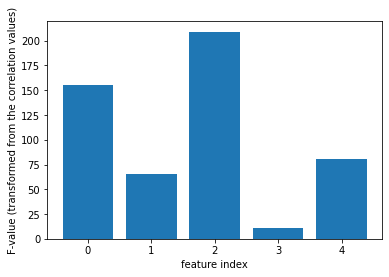

In [29]:
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

## Feature selection using Mutual information

In [31]:
# feature selection
f_selector = SelectKBest(score_func=mutual_info_regression, k='all')

In [32]:
# learn relationship from training data
f_selector.fit(x_train, y_train)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x7fdc4879e790>)

In [33]:
# transform train input data
x_train_fs = f_selector.transform(x_train)

In [34]:
# transform test input data
x_test_fs = f_selector.transform(x_test)

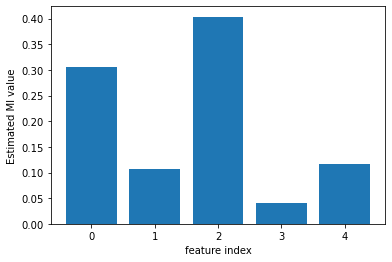

In [35]:
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("Estimated MI value")
plt.show()